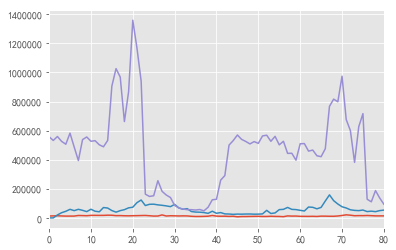

In [2]:
import requests
import js2py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
font = r'C:\Windows\Fonts\simfang.ttf'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

cookies = {
    'BAIDUID': 'C42831FB37B6ACEE44242063E856E70C:FG=1',
    'BIDUPSID': 'C42831FB37B6ACEE44242063E856E70C',
    'PSTM': '1562076125',
    'BDUSS': 'EtuUC1PNlVJUG9ZflZxQlN4ZnFFQmpSR0JoTHhGdEpZVzJtUGpEWFlteFZKbEpkRVFBQUFBJCQAAAAAAAAAAAEAAADjncwf2K~QxMjn1rnLrti8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFWZKl1VmSpdU',
    'Hm_lvt_d101ea4d2a5c67dab98251f0b5de24dc': '1563072554,1563072560',
    'locale': 'zh',
    'H_PS_PSSID': '1453_21091_29522_29519_28519_29099_28836_29220',
    'delPer': '0',
    'PSINO': '1',
    'BDRCVFR[Fc9oatPmwxn]': 'mk3SLVN4HKm',
    'BDRCVFR[gltLrB7qNCt]': 'mk3SLVN4HKm',
    'BDSFRCVID': 'lWIOJeC62AoqLR5w2wwLMB7y4gpMlnTTH6aoww-3Hg0B8ZBJ1-VJEG0PHM8g0Kubh7oaogKK0eOTHktF_2uxOjjg8UtVJeC6EG0P3J',
    'H_BDCLCKID_SF': 'tR30WJbHMTrDHJTg5DTjhPrMWHrTbMT-027OKKOF5b3CfI_6XboMK4-vQG3lW-QIyHrb0p6athF0hCPxDT--jjQM5MKXanvL-J4jo6rJabC3hKnmXU6qLT5XjxtjWTjHbbufsCjz0D3BMhrj3hj8hp0njxQyhqIqbTcBQJcDBnjKJfnRqfonDh8nXH7MJUntKHnfWKJO5hvvhb5O3M7O5MKmDloOW-TB5bbPLUQF5l8-sq0x05bke6j3DN_ttTLHf5vfL5rEKRT8jJjP-JbsMDCShUFs2pbAB2Q-5KL-0R7a8M_G5T5b5UAILGJ8tPbjBCJX-UbdJJjofP0zDU7JDMjbW45ZJCrpWeTxoUJdBCnJhhvG-4AbhP_ebPRiJPQ9QgbWLpQ7tt5W8ncFbT7l5hKpbt-q0x-jLn7ZVJO-KKCaMCPxjM5',
    'Hm_lpvt_d101ea4d2a5c67dab98251f0b5de24dc': '1563550673',
    'BCLID': '10962290440852223461',
    'ZD_ENTRY': 'baidu',
    'bdshare_firstime': '1563204065240',
    'BDORZ': 'FFFB88E999055A3F8A630C64834BD6D0',
    'bdindexid': 'vn0votgdpnc3vjpdq32dpjepj2',
}

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:68.0) Gecko/20100101 Firefox/68.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2',
    'X-Requested-With': 'XMLHttpRequest',
    'Connection': 'keep-alive',
    'Referer': 'http://index.baidu.com/v2/main/index.html',
}
js = open('decode.js','r',encoding= 'utf8').read()

def getIndex(keyword, startDate, endDate):
    params = (
        ('area', '0'),
        ('word', keyword),
        ('startDate', startDate),
        ('endDate', endDate),
    )
    response = requests.get('http://index.baidu.com/api/SearchApi/index', headers=headers, params=params, cookies=cookies)

    data1 = response.json()['data']['userIndexes'][0]['all']['data']
    uniqid = response.json()['data']['uniqid']

    params = (
        ('uniqid', uniqid),
    )
    response0 = requests.get('http://index.baidu.com/Interface/ptbk', headers=headers, params=params, cookies=cookies)

    data2 = response0.json()['data']
    return js2py.eval_js(js)(data2, data1)


res = [int(i) for i in getIndex('中国', '20180101', '20190720').split(',') if i]
res1 = [int(i) for i in getIndex('蔡徐坤', '20180101', '20190720').split(',') if i]
res2 = [int(i) for i in getIndex('NBA', '20180101', '20190720').split(',') if i]
pd.Series(res).plot()
pd.Series(res1).plot()
pd.Series(res2).plot()
plt.show()